<a href="https://colab.research.google.com/github/LucasColas/Machine-Learning-APS-Failure-at-Scania-Trucks/blob/main/Machine_Learning_Scania_Trucks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of KMeans

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

### Dataset

This database contains the component measurements for the APS of Scania trucks. 

In [3]:
from google.colab import drive 
drive.mount('/content/drive') #My dataset is in my Google Drive 

Mounted at /content/drive


In [5]:
Dataset = loadmat('/content/drive/My Drive/Machine Learning/scaniaTrucks_data.mat') 


In [8]:
Dataset.keys()

dict_keys(['__header__', '__version__', '__globals__', 'K', 'X', 'YR', 'None', '__function_workspace__'])

In [11]:
Dataset['YR']

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=uint8)

In [12]:
Xdf = pd.DataFrame(Dataset['X'])
print(Xdf)


           0    1     2    3    4    5      6        7          8    \
0      76698.0  0.0   0.0  0.0  0.0  0.0    0.0  37250.0  1432864.0   
1      33058.0  0.0   0.0  0.0  0.0  0.0    0.0  18254.0   653294.0   
2      41040.0  0.0   0.0  0.0  0.0  0.0    0.0   1648.0   370592.0   
3         12.0  0.0  10.0  0.0  0.0  0.0  318.0   2212.0     3232.0   
4      60874.0  0.0   0.0  0.0  0.0  0.0    0.0  43752.0  1966618.0   
...        ...  ...   ...  ...  ...  ...    ...      ...        ...   
69304  81852.0  0.0   0.0  0.0  0.0  0.0    0.0   5486.0   704012.0   
69305     18.0  8.0  26.0  0.0  0.0  0.0    0.0   6444.0     3308.0   
69306  79636.0  0.0   0.0  0.0  0.0  0.0    0.0  15062.0  1991298.0   
69307    110.0  0.0   0.0  0.0  0.0  0.0    0.0    198.0     3730.0   
69308      8.0  2.0   2.0  0.0  0.0  0.0    0.0   1350.0     3328.0   

             9    ...        120       121       122       123       124  \
0      3664156.0  ...  1240520.0  493384.0  721044.0  469792.0  339156.

In [37]:
YR = Dataset['YR']

In [39]:
Xall = np.array(Xdf)
Yall = np.array(YR)
n_samples = 5000
Rand_val = np.random.choice(range(Xall.shape[0]), n_samples, replace=False)
X = Xall[Rand_val,:]
Y = Yall[Rand_val]
print(X.shape)

(5000, 130)


In [40]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,126.0,5630.0,3414.0,...,148.0,58.0,116.0,54.0,42.0,34.0,0.0,0.0,0.0,0.0
1,40754.0,0.0,0.0,0.0,0.0,0.0,0.0,260.0,1151622.0,1291420.0,...,230842.0,206080.0,651226.0,685326.0,97302.0,32438.0,23096.0,0.0,0.0,0.0
2,39404.0,0.0,0.0,0.0,0.0,0.0,0.0,94564.0,1069516.0,1286744.0,...,213230.0,117752.0,208278.0,179344.0,196716.0,188080.0,506286.0,22848.0,0.0,0.0
3,2.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,4042.0,...,76.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1050.0,0.0,0.0,0.0,0.0,0.0,0.0,71892.0,57018.0,15658.0,...,3678.0,3092.0,5210.0,10028.0,19058.0,4622.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,60956.0,0.0,0.0,0.0,0.0,0.0,0.0,2248.0,950102.0,2527730.0,...,420878.0,208804.0,485252.0,501012.0,666906.0,400810.0,41504.0,514.0,0.0,0.0
4996,19730.0,0.0,0.0,0.0,0.0,0.0,0.0,299932.0,834210.0,32870.0,...,111810.0,36460.0,77610.0,96722.0,92432.0,394568.0,20908.0,0.0,0.0,0.0
4997,22396.0,0.0,0.0,0.0,0.0,0.0,0.0,284.0,215128.0,934924.0,...,126654.0,64620.0,118822.0,130396.0,83092.0,84284.0,298362.0,23206.0,0.0,0.0
4998,7958.0,0.0,0.0,0.0,0.0,0.0,0.0,137078.0,308478.0,116836.0,...,24210.0,8824.0,23750.0,47588.0,27142.0,185670.0,5974.0,74.0,0.0,0.0


### PCA

#### 2 Principal Components

In [24]:
from sklearn.decomposition import PCA

(2,)


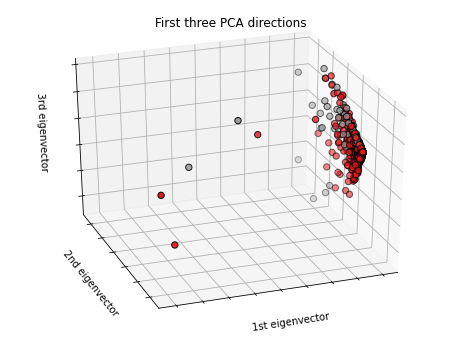

In [45]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot()

X_reduced = PCA(n_components=2).fit_transform(X)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    c=Y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])

plt.show()

#### 3 PCA

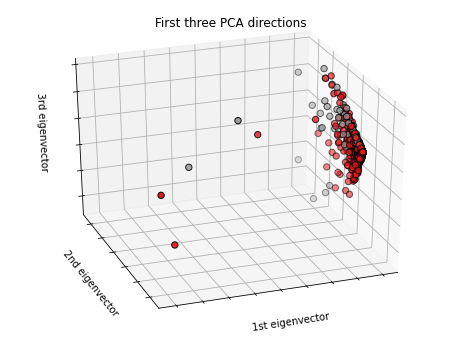

In [46]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=Y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

#### Optimum

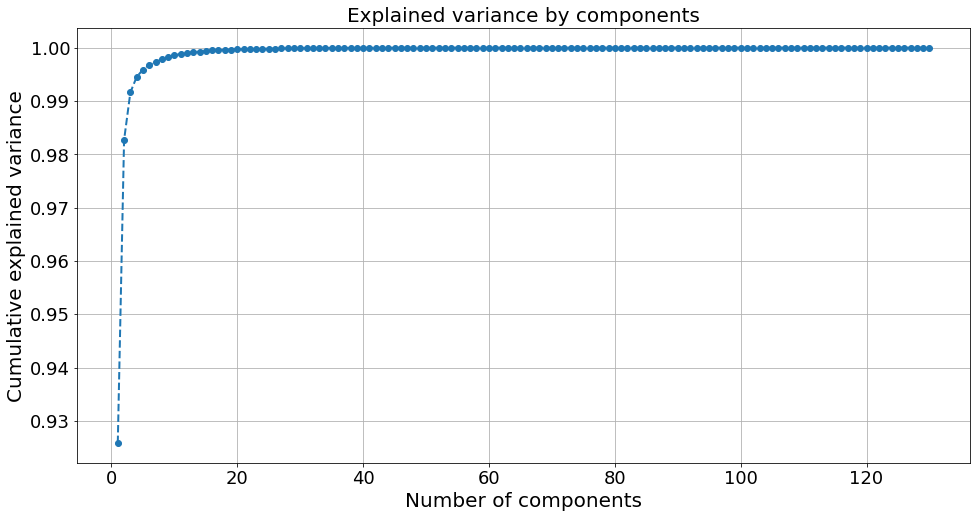

In [48]:
pca = PCA()
pca.fit(X)
cumsum_var = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize = (16,8))
plt.plot(range(1,131), cumsum_var[0:130], marker='o', ls='--', lw=2)
plt.grid()
plt.xlabel("Number of components",fontsize=20)
plt.ylabel("Cumulative explained variance",fontsize=20)
plt.title("Explained variance by components",fontsize=20)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)